### **Customer Churn Prediction (Binary Classification)**

**Problem**
- Predict whether a customer will leave (churn) a telecom/banking company.

**Approach**

1. Dataset includes **customer demographics, service usage, and account details**.
2. **Preprocessing**:

   * Encoded categorical features (contract type, payment method).
   * Standardized numerical features (monthly charges, tenure).
3. **Models**:

   * **Logistic Regression** as baseline (interpretable coefficients).
   * **Random Forest Classifier** for higher predictive power.
4. **Evaluation Metrics**:

   * Accuracy, Precision, Recall, **AUC-ROC**, **Precision-Recall Curve** (important for churn).

**Key Insights**

* **High Recall** is critical (better to catch most churners).
* Random Forest achieved **higher AUC**, capturing more patterns.
* Important churn indicators: **tenure, contract type, monthly charges**.

***Enterprise Use Case***

* Helps telecoms, SaaS, and banks in **retention strategies**.
* Can be integrated into **CRM systems** to trigger retention offers.
* Reduces **customer acquisition cost (CAC)** by focusing on retention.

### 1. Import Libraries


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import seaborn as sns


### Load dataset

In [7]:
# Dataset Link : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

df = pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes  

### 3. Preprocessing


In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Drop customerID (not useful for prediction)
df = df.drop('customerID', axis=1)

# Fix TotalCharges column (some missing/whitespace values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Convert column names to lowercase for consistency
df.columns = df.columns.str.lower()

# Separate categorical and numeric columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Encode target variable
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])  # Yes=1, No=0

# Remove target column from categorical list
cat_cols.remove('churn')

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Features and target
X = df.drop('churn', axis=1)
y = df['churn']

# Scale numeric features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Preprocessing complete ✅")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Preprocessing complete ✅
Train shape: (5634, 30)
Test shape: (1409, 30)


### 4. Model Training


In [9]:

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


### 5. Model Evaluation



Model: Logistic Regression
Accuracy: 0.8055
Precision: 0.6572
Recall: 0.5588
F1 Score: 0.6040
ROC-AUC: 0.8420

Model: Random Forest
Accuracy: 0.7878
Precision: 0.6263
Recall: 0.4973
F1 Score: 0.5544
ROC-AUC: 0.8250


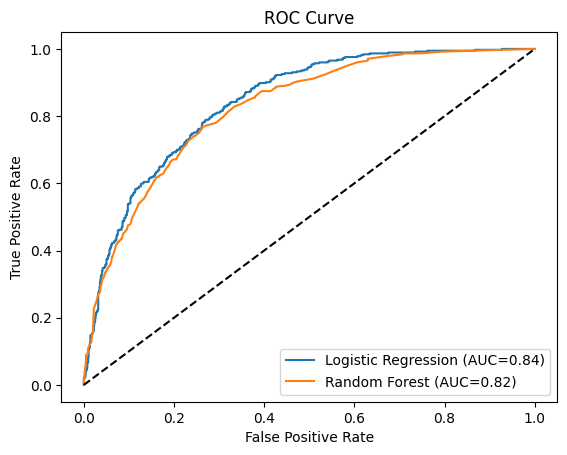

In [11]:
models = {
    "Logistic Regression": log_reg,
    "Random Forest": rf
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\nModel: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


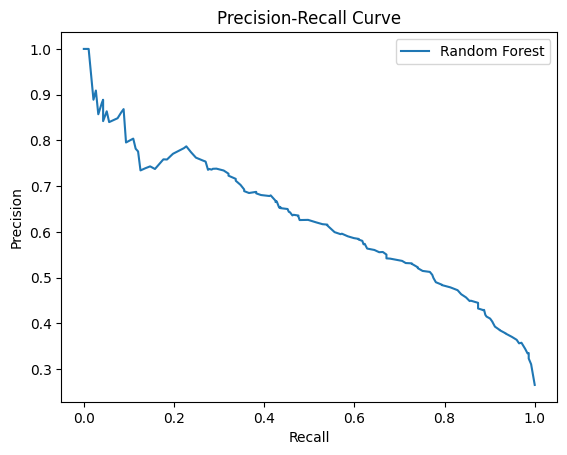

In [13]:
# Precision-Recall Curve for Random Forest
y_proba_rf = rf.predict_proba(X_test)[:, 1]
prec, rec, _ = precision_recall_curve(y_test, y_proba_rf)
plt.plot(rec, prec, label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()